In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import os
import numpy as np
from wordcloud import WordCloud

%matplotlib inline


In [2]:
def data_locate(rel_path_to_input,a):
    cwd = os.getcwd()
    stem=cwd
    for i in range(a):
        stem=os.path.abspath(os.path.join(stem, '..'))
    data_loc=os.path.join(stem , rel_path_to_input)
    os.chdir(data_loc)
    sub_files = os.listdir(data_loc)
    print ("Current Directory: ", cwd)
    print ("Data location: " , data_loc)
    print (sub_files)
    return data_loc, sub_files

In [3]:
data_locate("Data\Models\Dan Matlab\code\datafiles_zaf",0)

Current Directory:  C:\Users\zafri\Documents\Senior_Design
Data location:  C:\Users\zafri\Documents\Senior_Design\Data\Models\Dan Matlab\code\datafiles_zaf
['190RXN_EC_Dict_FINAL', 'APPENDED_RECON_SCRAPE_DATA_ALL.xlsx', 'Chemaxon calc.csv', 'Dan_matlab_Model_wstrings.xlsx', 'df_ec', 'df_ec.xlsx', 'Dict_Of_Features.xlsx', 'EC_ONLY_260_FINAL.xlsx', 'Features Sheet - Metabolite Features_zaf.csv', 'Features Sheet - Reaction Features.csv', 'file.txt', 'Kinetic_Curate_Spring.xlsx', 'KINETIC_DATASET_FINAL(EC_matched)', 'KINETIC_DATASET_FINAL(EC_matched).xlsx', 'Kinetic__matched(beforemanualcuration.xlsx', 'Kinetic__matched_CURATECopy.xlsx', 'Kinetic__matched_CURATECopy_keep.xlsx', 'Km_Matrix_wMetadata.xlsx', 'Km_Numeric_all.xlsx', 'Km_Numeric_NanNone.xlsx', 'Km_Numeric_NanTrimmed.xlsx', 'network_info.txt', 'RECONcuration_done_FROM_HONG.xlsx', 'RECON_newrxn_done_FROM_HONG.xlsx', 'RXN_EC_Dict_260_FINAL', 'RXN_EC_Dict_260_FINAL.xlsx', 'RXN_W_EC_Dict_FINAL', 'sample_km_matrix.xlsx', 'USE_THIS_Dan

('C:\\Users\\zafri\\Documents\\Senior_Design\\Data\\Models\\Dan Matlab\\code\\datafiles_zaf',
 ['190RXN_EC_Dict_FINAL',
  'APPENDED_RECON_SCRAPE_DATA_ALL.xlsx',
  'Chemaxon calc.csv',
  'Dan_matlab_Model_wstrings.xlsx',
  'df_ec',
  'df_ec.xlsx',
  'Dict_Of_Features.xlsx',
  'EC_ONLY_260_FINAL.xlsx',
  'Features Sheet - Metabolite Features_zaf.csv',
  'Features Sheet - Reaction Features.csv',
  'file.txt',
  'Kinetic_Curate_Spring.xlsx',
  'KINETIC_DATASET_FINAL(EC_matched)',
  'KINETIC_DATASET_FINAL(EC_matched).xlsx',
  'Kinetic__matched(beforemanualcuration.xlsx',
  'Kinetic__matched_CURATECopy.xlsx',
  'Kinetic__matched_CURATECopy_keep.xlsx',
  'Km_Matrix_wMetadata.xlsx',
  'Km_Numeric_all.xlsx',
  'Km_Numeric_NanNone.xlsx',
  'Km_Numeric_NanTrimmed.xlsx',
  'network_info.txt',
  'RECONcuration_done_FROM_HONG.xlsx',
  'RECON_newrxn_done_FROM_HONG.xlsx',
  'RXN_EC_Dict_260_FINAL',
  'RXN_EC_Dict_260_FINAL.xlsx',
  'RXN_W_EC_Dict_FINAL',
  'sample_km_matrix.xlsx',
  'USE_THIS_Dan_matl

In [4]:
kinetic_df=pd.read_excel("Km_Matrix_wMetadata.xlsx")
kinetic_df=kinetic_df.rename(columns={"Strain/Tissue": "Tissue"})

In [5]:
kinetic_df


,df_EC_BIGGID,EC_Number,Recommended Enzyme Name,Tissue,Cofactor,Cofactor Concentration,BIGG ID,Value Type,Value,Deviation,...,Ring bond count,Ring count,Ring system count,Rotatable bond count,Smallest ring size,Smallest ring system size,Stereo double bond count,Wiener polarity,Rotatable_Bond (Bool),has valid conformer (Bool)
0,LDH_L,1.1.1.27,L-lactate dehydrogenase,NaN,NaN,NaN,pyr,km,3.000000e-05,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
1,LDH_L,1.1.1.27,L-lactate dehydrogenase,NaN,NaN,NaN,pyr,km,3.980000e-04,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
2,LDH_L,1.1.1.27,L-lactate dehydrogenase,liverwildtypeisoenzyme5,NaN,NaN,pyr,km,3.980000e-04,21.000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
3,LDH_L,1.1.1.27,L-lactate dehydrogenase,heartwildtype,NaN,NaN,pyr,km,5.800000e-05,0.009,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
4,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHM,NaN,NaN,pyr,km,1.700000e-04,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
5,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHM,NaN,NaN,lac__L,km,1.100000e-02,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
6,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHH,NaN,NaN,pyr,km,5.500000e-05,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
7,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHH,NaN,NaN,lac__L,km,1.300000e-02,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
8,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHM,NaN,NaN,nad,km,5.000000e-06,NaN,...,26.0,5.0,4.0,11.0,5.0,1.0,0.0,74.0,0.0,1.0
9,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHM,NaN,NaN,nad,km,9.300000e-05,NaN,...,26.0,5.0,4.0,11.0,5.0,1.0,0.0,74.0,0.0,1.0


In [6]:
def make_numeric(Kinetic_df):
    Kinetic_df=Kinetic_df.apply(pd.to_numeric, errors='ignore')

    #Kinetic_df= Kinetic_df.drop("EC_Number")
    non_floats = []
    for col in Kinetic_df.columns:
        if str(Kinetic_df[col].dtypes) != ("float64"):
            #print (str(Kinetic_df[col].dtypes)=="float64")
            #print (str(Kinetic_df[col].dtypes)=="int64")

            non_floats.append(col)
    print (non_floats)
    output_df = Kinetic_df.drop(non_floats, axis=1)
    
        
        
    #output_df = Kinetic_df.drop(columns=non_floats)
    return output_df

In [7]:
Kinetic_KM_numeric=make_numeric(kinetic_df)
Km_num_noNa=Kinetic_KM_numeric.dropna(axis=0, how="any")

['df_EC_BIGGID', 'EC_Number', 'Recommended Enzyme Name', 'Tissue', 'Cofactor', 'Cofactor Concentration', 'BIGG ID', 'Value Type', 'Units', 'Buffer/Media', 'Structure_x', 'Uniprot', 'Reactants', 'Products', 'Reactant_ct', 'Product_ct', 'GPR_unique_genes', 'GPR_AND_CT', 'GPR_OR_CT', 'Rxn_Met_List', 'matched_bigg_id', 'met_not_found', 'index', 'BIGGID']


In [8]:
Kinetic_KM_numeric.describe()


,Value,Deviation,pH,Temp (°C),Flux,ssb_mean_rel_exposed,ssb_sasa,ssb_size,ssb_ovality,ssb_avg_res_depth,...,Ring bond count,Ring count,Ring system count,Rotatable bond count,Smallest ring size,Smallest ring system size,Stereo double bond count,Wiener polarity,Rotatable_Bond (Bool),has valid conformer (Bool)
count,1.306000e+03,2.090000e+02,883.000000,627.000000,1182.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.0
mean,5.560992e-03,8.891431e+00,7.733862,30.761244,0.109313,0.288035,44204.176883,1099.304729,411.255904,13.604721,...,10.274055,1.980241,1.490550,7.117698,3.191581,0.649485,0.010309,36.770619,0.127148,1.0
std,9.642651e-02,2.653562e+01,0.696572,6.089396,0.297547,0.061953,53631.120196,1558.176533,92.230959,35.681593,...,10.004882,1.942099,1.489688,4.649252,2.549304,0.591564,0.123979,26.353470,0.333282,0.0
min,2.300000e-10,6.900000e-07,5.000000,4.000000,-0.824944,0.209496,10078.000000,173.000000,305.530862,2.096814,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2.700000e-05,6.000000e-02,7.400000,25.000000,0.001026,0.235039,16742.000000,296.000000,347.945893,2.679046,...,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,11.000000,0.000000,1.0
50%,1.000000e-04,3.200000e-01,7.500000,30.000000,0.005498,0.289154,25496.000000,517.000000,377.070181,2.931593,...,6.000000,1.000000,1.000000,7.000000,5.000000,1.000000,0.000000,24.000000,0.000000,1.0
75%,5.575000e-04,3.000000e+00,8.000000,37.000000,0.380951,0.325848,45274.000000,1125.000000,431.393022,4.021800,...,15.000000,3.000000,2.000000,9.000000,5.000000,1.000000,0.000000,54.000000,0.000000,1.0
max,3.300000e+00,2.300000e+02,10.000000,41.000000,0.824944,0.578256,222875.000000,6311.000000,700.990076,139.754732,...,26.000000,5.000000,4.000000,36.000000,6.000000,4.000000,2.000000,94.000000,1.000000,1.0


In [9]:
print (kinetic_df.shape)
print (Kinetic_KM_numeric.shape)
print (Km_num_noNa)

(1306, 107)
(1306, 83)
Empty DataFrame
Columns: [Value, Deviation, pH, Temp (°C), Flux, ssb_mean_rel_exposed, ssb_sasa, ssb_size, ssb_ovality, ssb_avg_res_depth, ssb_ca_depth, ssb_per_NP, ssb_per_P, ssb_per_pos, ssb_per_neg, ssb_per_irr, ssb_per_alpha, ssb_per_beta_bridge, ssb_per_ext_beta, ssb_per_310_helix, ssb_per_5_helix, ssb_per_hbond_turn, ssb_per_bent, ssb_per_S_NP, ssb_per_S_P, ssb__per_S_pos, ssb_per_S_neg, ssb_per_B_NP, ssb_per_B_P, ssb_per_B_pos, ssb_per_B_neg, ssb_per_S, ssb_per_B, Met_CHECK, Atom count, Exact molecular weight, Molecular weight, molecular avgpol, a(xx), a(yy), a(zz), dipole, Formal charge, molecular, Aliphatic bond count, Aliphatic ring count, Aromatic atom count, Aromatic bond count, Aromatic ring count, Asymmetric atom count, Balaban index, Bond count, Carboaliphatic ring count, Carboaromatic ring count, Carbo ring count, Chain atom count, Chain bond count, Chiral center count, Cyclomatic number, Distance, Fragment count, fsp3, Fused aliphatic ring count,

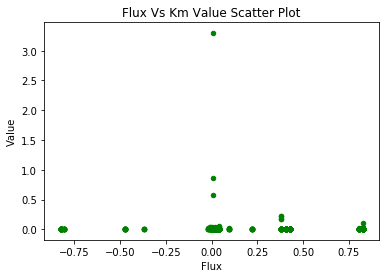

In [11]:
Kinetic_KM_numeric.plot(kind='scatter',x='Flux',y='Value',color='green', title="Flux Vs Km Value Scatter Plot")

plt.savefig("Flux vs Km  Scatter Plot")


C:\Users\zafri\Anaconda2\envs\py36\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\zafri\Anaconda2\envs\py36\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\zafri\Anaconda2\envs\py36\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\zafri\Anaconda2\envs\py36\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\zafri\Anaconda2\envs\py36\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


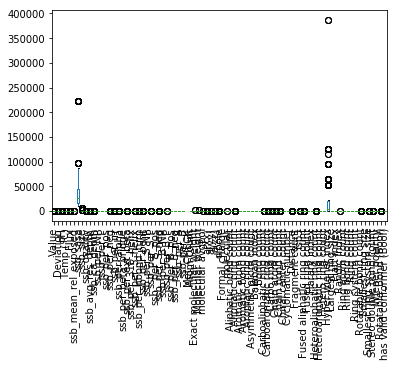

In [12]:
Kinetic_KM_numeric.plot.box() 
plt.xticks(rotation="vertical")
plt.subplots_adjust(bottom=0.15)

plt.show() 

In [13]:
kinetic_df.Tissue.unique()

array([nan, 'liverwildtypeisoenzyme5', 'heartwildtype', 'wildtypeLDHM',
       'wildtypeLDHH', 'fibroblastwildtype', 'fetalbrainwildtype',
       'erythrocytewildtype', 'liverwildtypeisoenzymeMDH1',
       'brainwildtype', 'liverwildtypeisoenzymeME1',
       'adipocytewildtypeisoenzymME1', 'Colo205cellwildtypeisoenzymME1',
       'A549cellwildtypeisoenzymME1', 'RPMI1788cellwildtypeisoenzymME1',
       'MCF7cellwildtypeisoenzymME1', 'liverwildtypeisoenzymME1',
       'placentawildtype', 'liverwildtypeisoenzymeAldh2',
       'polymorphonuclearleukocytewildtypeisoenzymeALDH3A2',
       'liverwildtypeisoenzymALDH9A1', 'liverwildtype',
       'liverwildtypeisoenzyme1', 'liverwildtypeisoenzyme2',
       "brainwildtypeE3'isoform", 'liverwildtypeE1', 'liverwildtypeE2',
       'brainwildtypeisozymeE6.8', 'brainwildtypeisozymeE6.6',
       'brainwildtypeisozymeE8.5', 'brainwildtypeisozymeE9.0',
       'HeLacellwildtype', 'wildtype', 'wildtypeisoenzymehGDH1',
       'wildtypeisoenzymehGDH2', 'hep

In [14]:
#tissuetype
text = " ".join(str(strain) for strain in kinetic_df.Tissue)
text=text.replace("wildtype"," ")
text=text.replace("nan","")

print (text)

  liver isoenzyme5 heart   LDHM  LDHM  LDHH  LDHH  LDHM  LDHM  LDHH  LDHH  fibroblast  fibroblast                   heart  heart  heart  heart  fetalbrain  fetalbrain  erythrocyte  erythrocyte  erythrocyte  erythrocyte  liver isoenzymeMDH1                    brain  brain  brain  brain  brain  brain  brain  brain  brain  liver isoenzymeME1 liver isoenzymeME1 liver isoenzymeME1 liver isoenzymeME1 liver isoenzymeME1 liver isoenzymeME1 adipocyte isoenzymME1 Colo205cell isoenzymME1 A549cell isoenzymME1 RPMI1788cell isoenzymME1 MCF7cell isoenzymME1 liver isoenzymME1                                                        placenta  placenta                     placenta  placenta  placenta  placenta                           liver isoenzymeAldh2 polymorphonuclearleukocyte isoenzymeALDH3A2 liver isoenzymALDH9A1 liver isoenzymALDH9A1 liver  liver isoenzyme1 liver isoenzyme2 liver isoenzyme1 liver isoenzyme2 liver  liver  liver  liver  liver  liver  liver  erythrocyte  brain E3'isoform brain E3'is

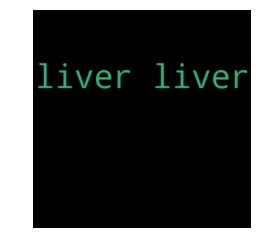

In [15]:
wordcloud = WordCloud(width=480, height=480, max_font_size=100, min_font_size=50).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

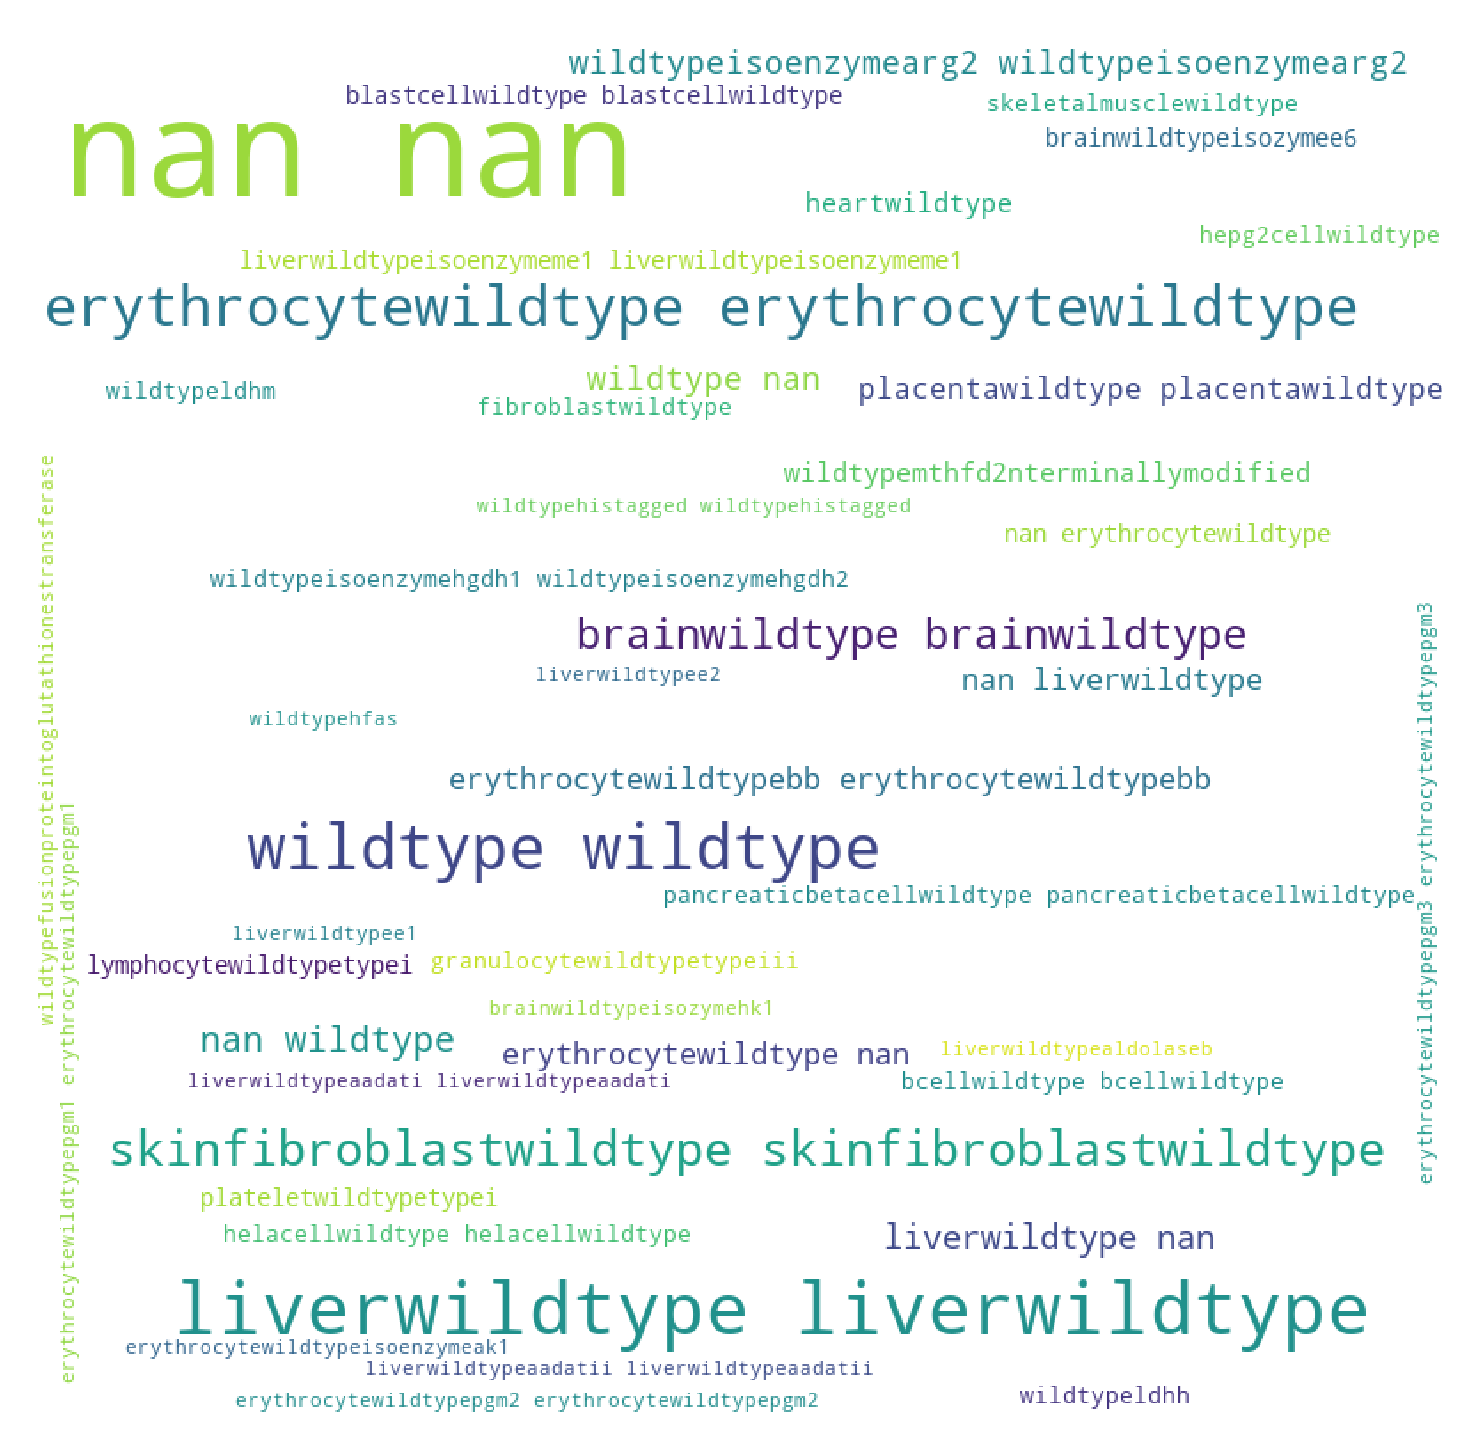

In [18]:
comment_words = ' '
#stopwords = set(STOPWORDS) 

for val in kinetic_df.Tissue: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("Tissue_type_word_cloud.png")
plt.show() 

In [35]:
kinetic_df

,df_EC_BIGGID,EC_Number,Recommended Enzyme Name,Tissue,Cofactor,Cofactor Concentration,BIGG ID,Value Type,Value,Deviation,...,Ring bond count,Ring count,Ring system count,Rotatable bond count,Smallest ring size,Smallest ring system size,Stereo double bond count,Wiener polarity,Rotatable_Bond (Bool),has valid conformer (Bool)
0,LDH_L,1.1.1.27,L-lactate dehydrogenase,NaN,NaN,NaN,pyr,km,3.000000e-05,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
1,LDH_L,1.1.1.27,L-lactate dehydrogenase,NaN,NaN,NaN,pyr,km,3.980000e-04,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
2,LDH_L,1.1.1.27,L-lactate dehydrogenase,liverwildtypeisoenzyme5,NaN,NaN,pyr,km,3.980000e-04,21.000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
3,LDH_L,1.1.1.27,L-lactate dehydrogenase,heartwildtype,NaN,NaN,pyr,km,5.800000e-05,0.009,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
4,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHM,NaN,NaN,pyr,km,1.700000e-04,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
5,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHM,NaN,NaN,lac__L,km,1.100000e-02,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
6,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHH,NaN,NaN,pyr,km,5.500000e-05,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
7,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHH,NaN,NaN,lac__L,km,1.300000e-02,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,1.0,1.0
8,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHM,NaN,NaN,nad,km,5.000000e-06,NaN,...,26.0,5.0,4.0,11.0,5.0,1.0,0.0,74.0,0.0,1.0
9,LDH_L,1.1.1.27,L-lactate dehydrogenase,wildtypeLDHM,NaN,NaN,nad,km,9.300000e-05,NaN,...,26.0,5.0,4.0,11.0,5.0,1.0,0.0,74.0,0.0,1.0


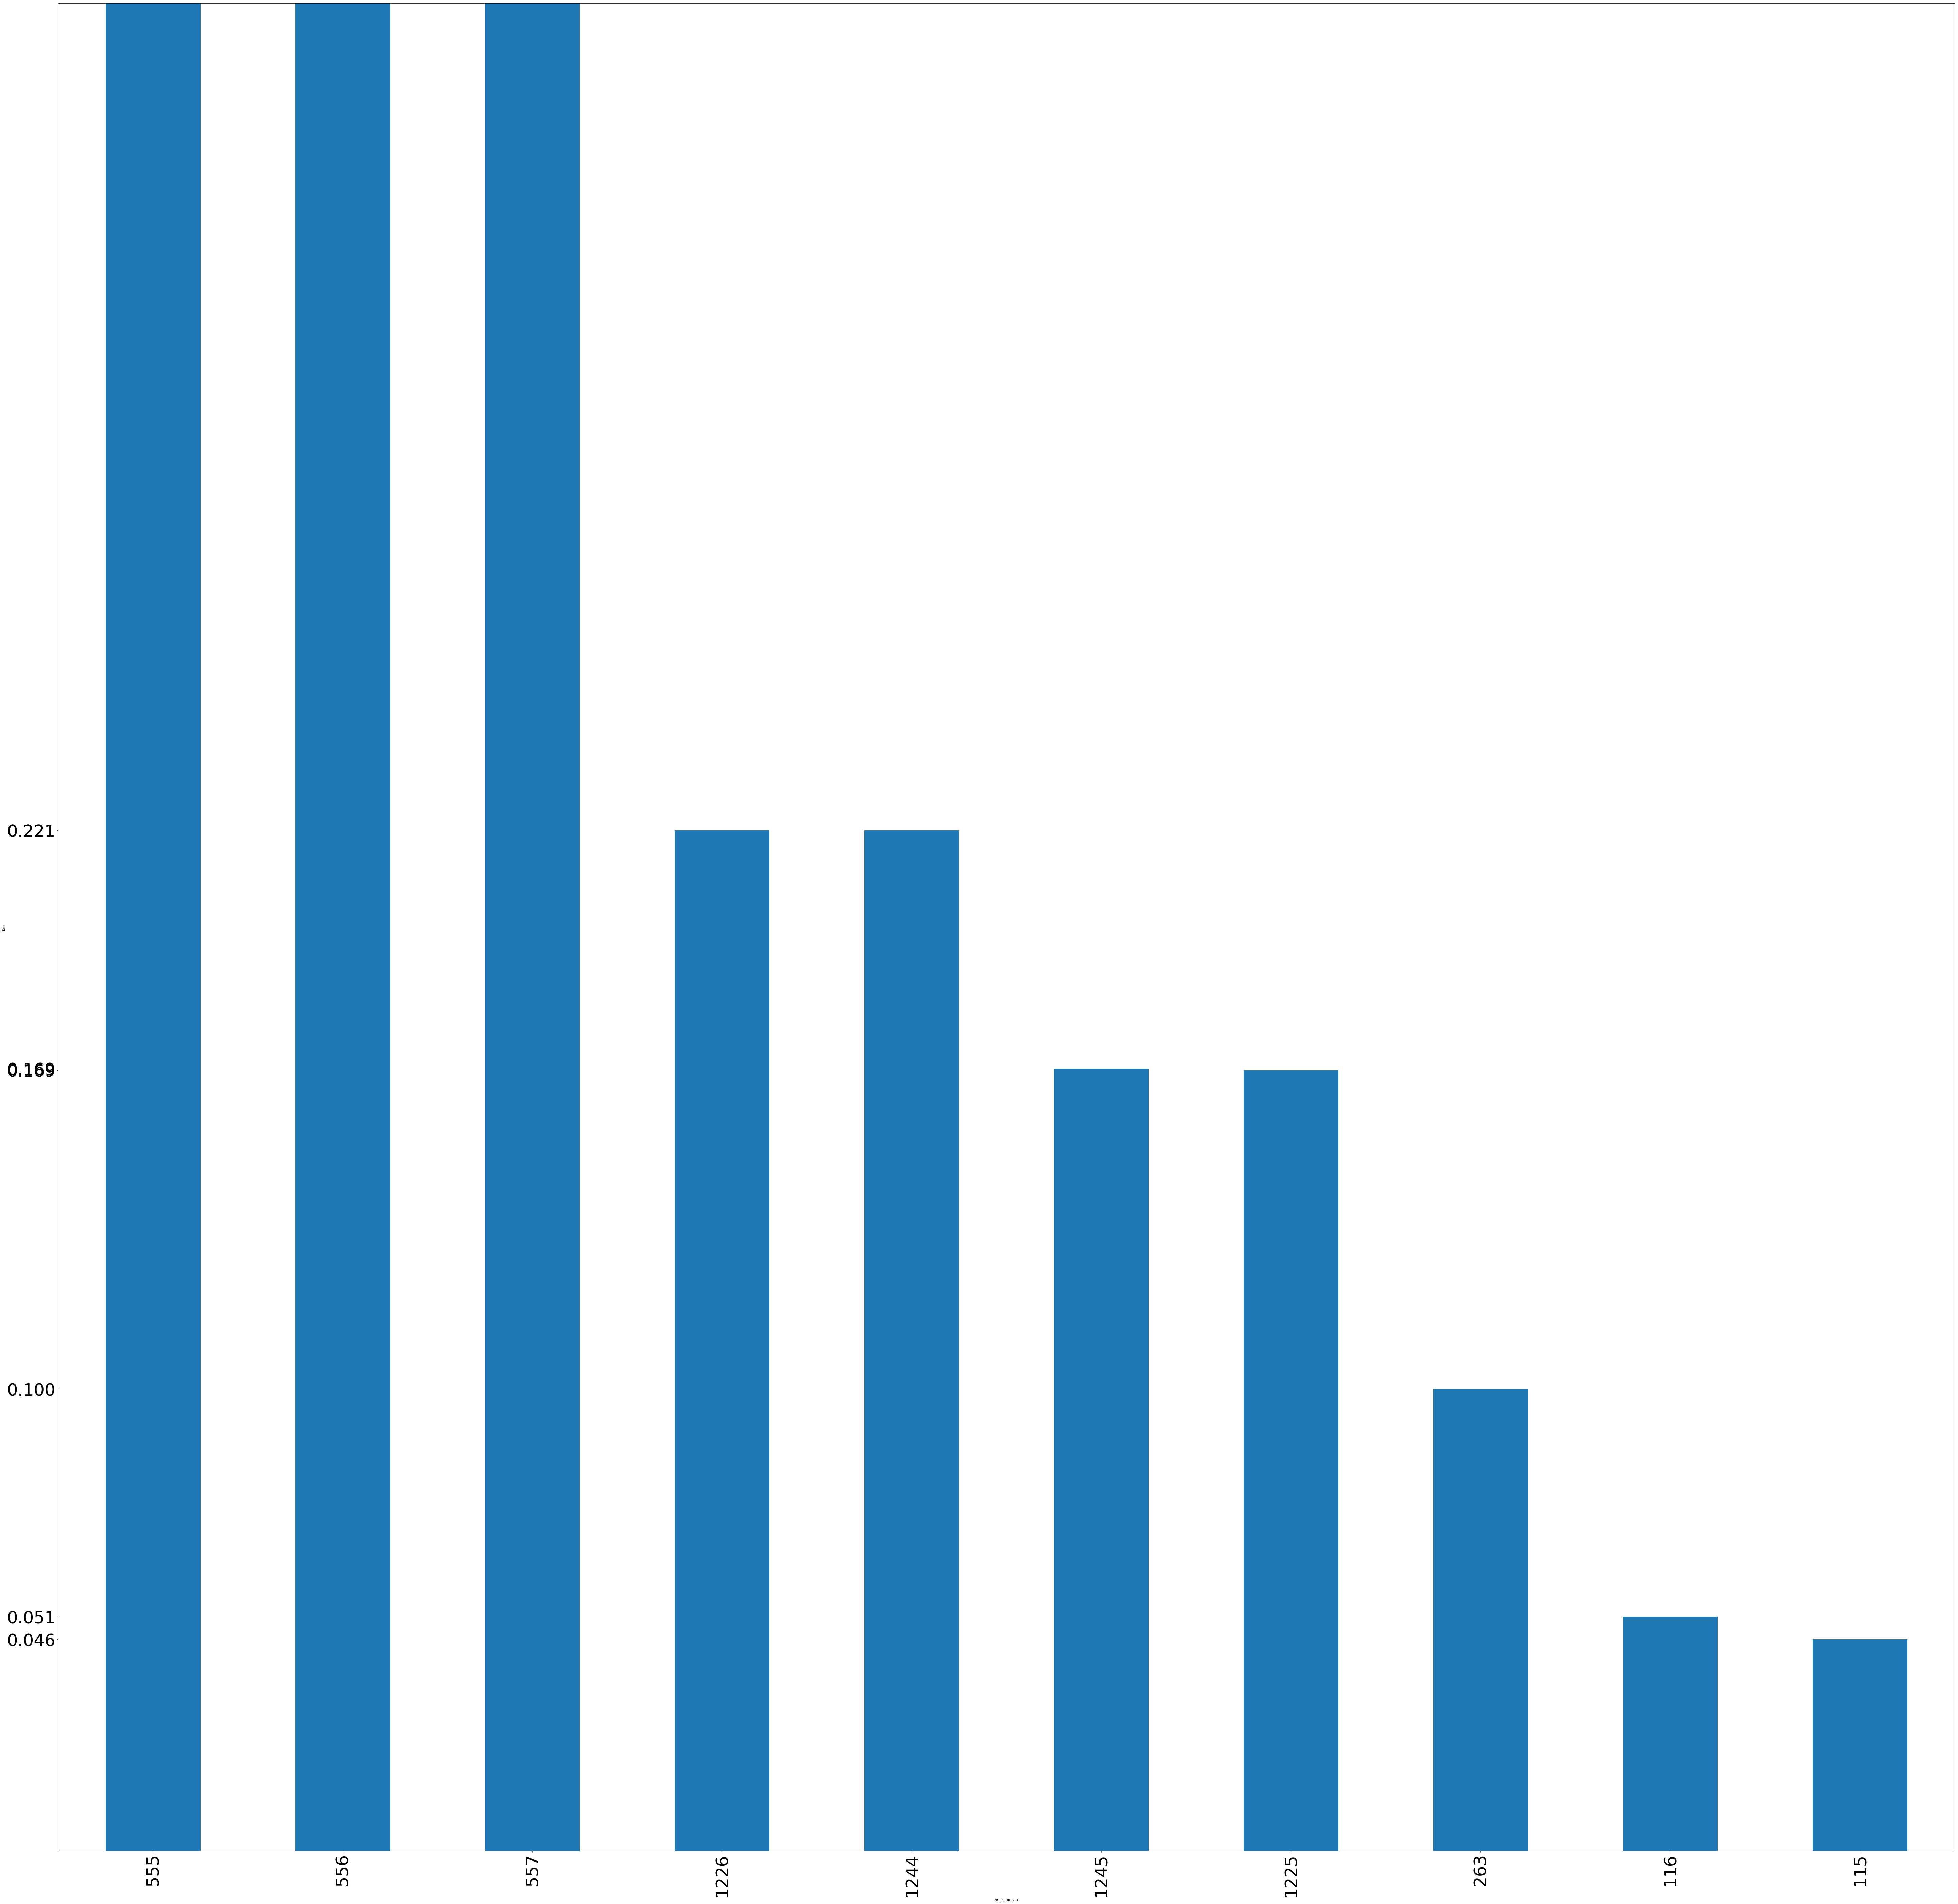

In [45]:
plt.figure(figsize=(100,100))
kinetic_df.nlargest(10, "Value").sort_values(by="Value",ascending=False)["Value"].plot.bar()
plt.xticks(rotation=90, fontsize=50 )
plt.yticks(kinetic_df.nlargest(10, "Value").sort_values(by="Value",ascending=False)["Value"], fontsize=50)
plt.ylim([0, .4])
plt.xlabel("df_EC_BIGGID")
plt.ylabel("Km")
plt.show()

In [66]:
def plot_correlation(df, size):
    corr= df.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    
    cax=ax.matshow(corr, cmap='GnBu')
    plt.xticks(range(len(corr.columns)),corr.columns, rotation="vertical",fontsize = 30)
    plt.yticks(range(len(corr.columns)),corr.columns, fontsize = 30)
    
    plt.colorbar(cax)
    plt.savefig("Correlation Plot.png")
    plt.show()

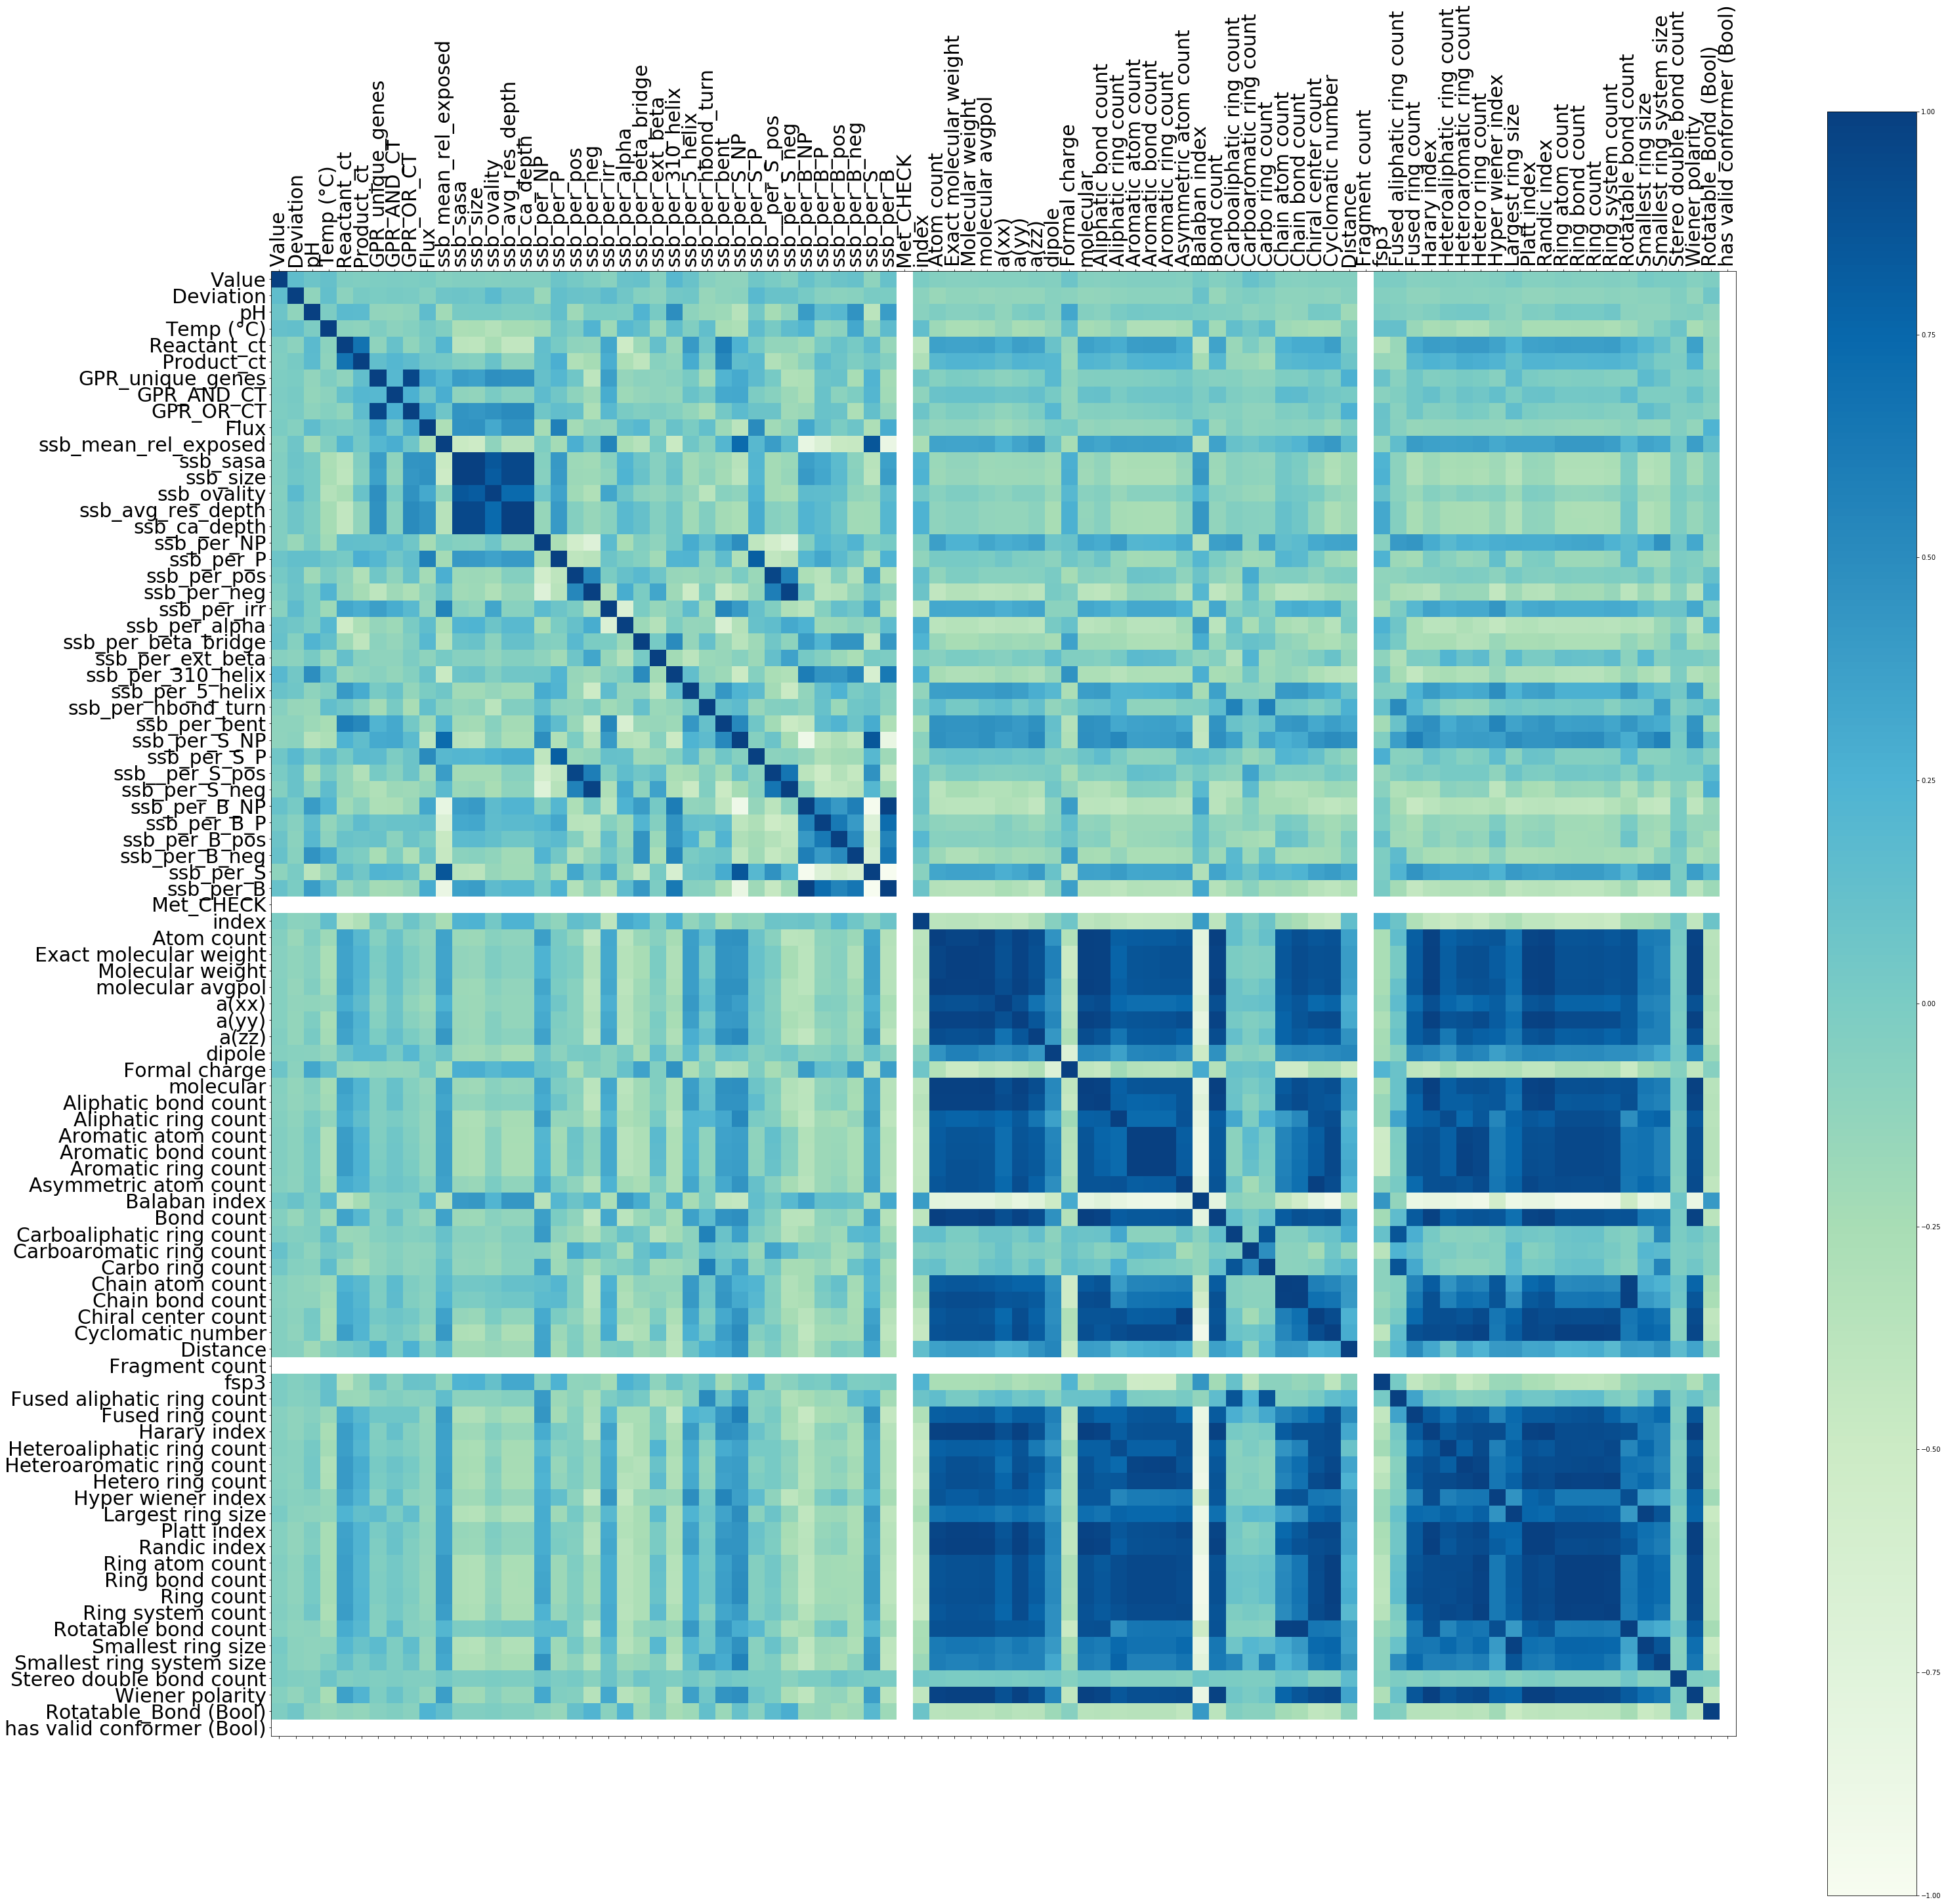

In [67]:
plot_correlation(kinetic_df, 50 )

In [ ]:
plot_correlation(kinetic_df, 60 )

In [ ]:
plot_correlation(Kinetic_KM_numeric, size=25 )

In [47]:
range(int(Kinetic_KM_numeric["Value"].min()),int(Kinetic_KM_numeric["Value"].max()))

range(0, 3)

ValueError: x and y must have same first dimension, but have shapes (1306,) and (3,)

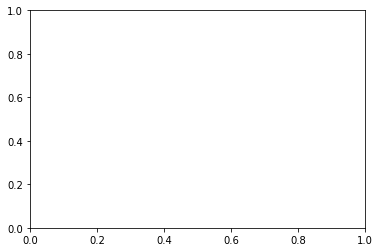

In [48]:
#kwargs = dict(histtype='stepfilled', normed=True, bins=50)
plt.plot(Kinetic_KM_numeric["Value"], range(int(Kinetic_KM_numeric["Value"].min()),int(Kinetic_KM_numeric["Value"].max())))

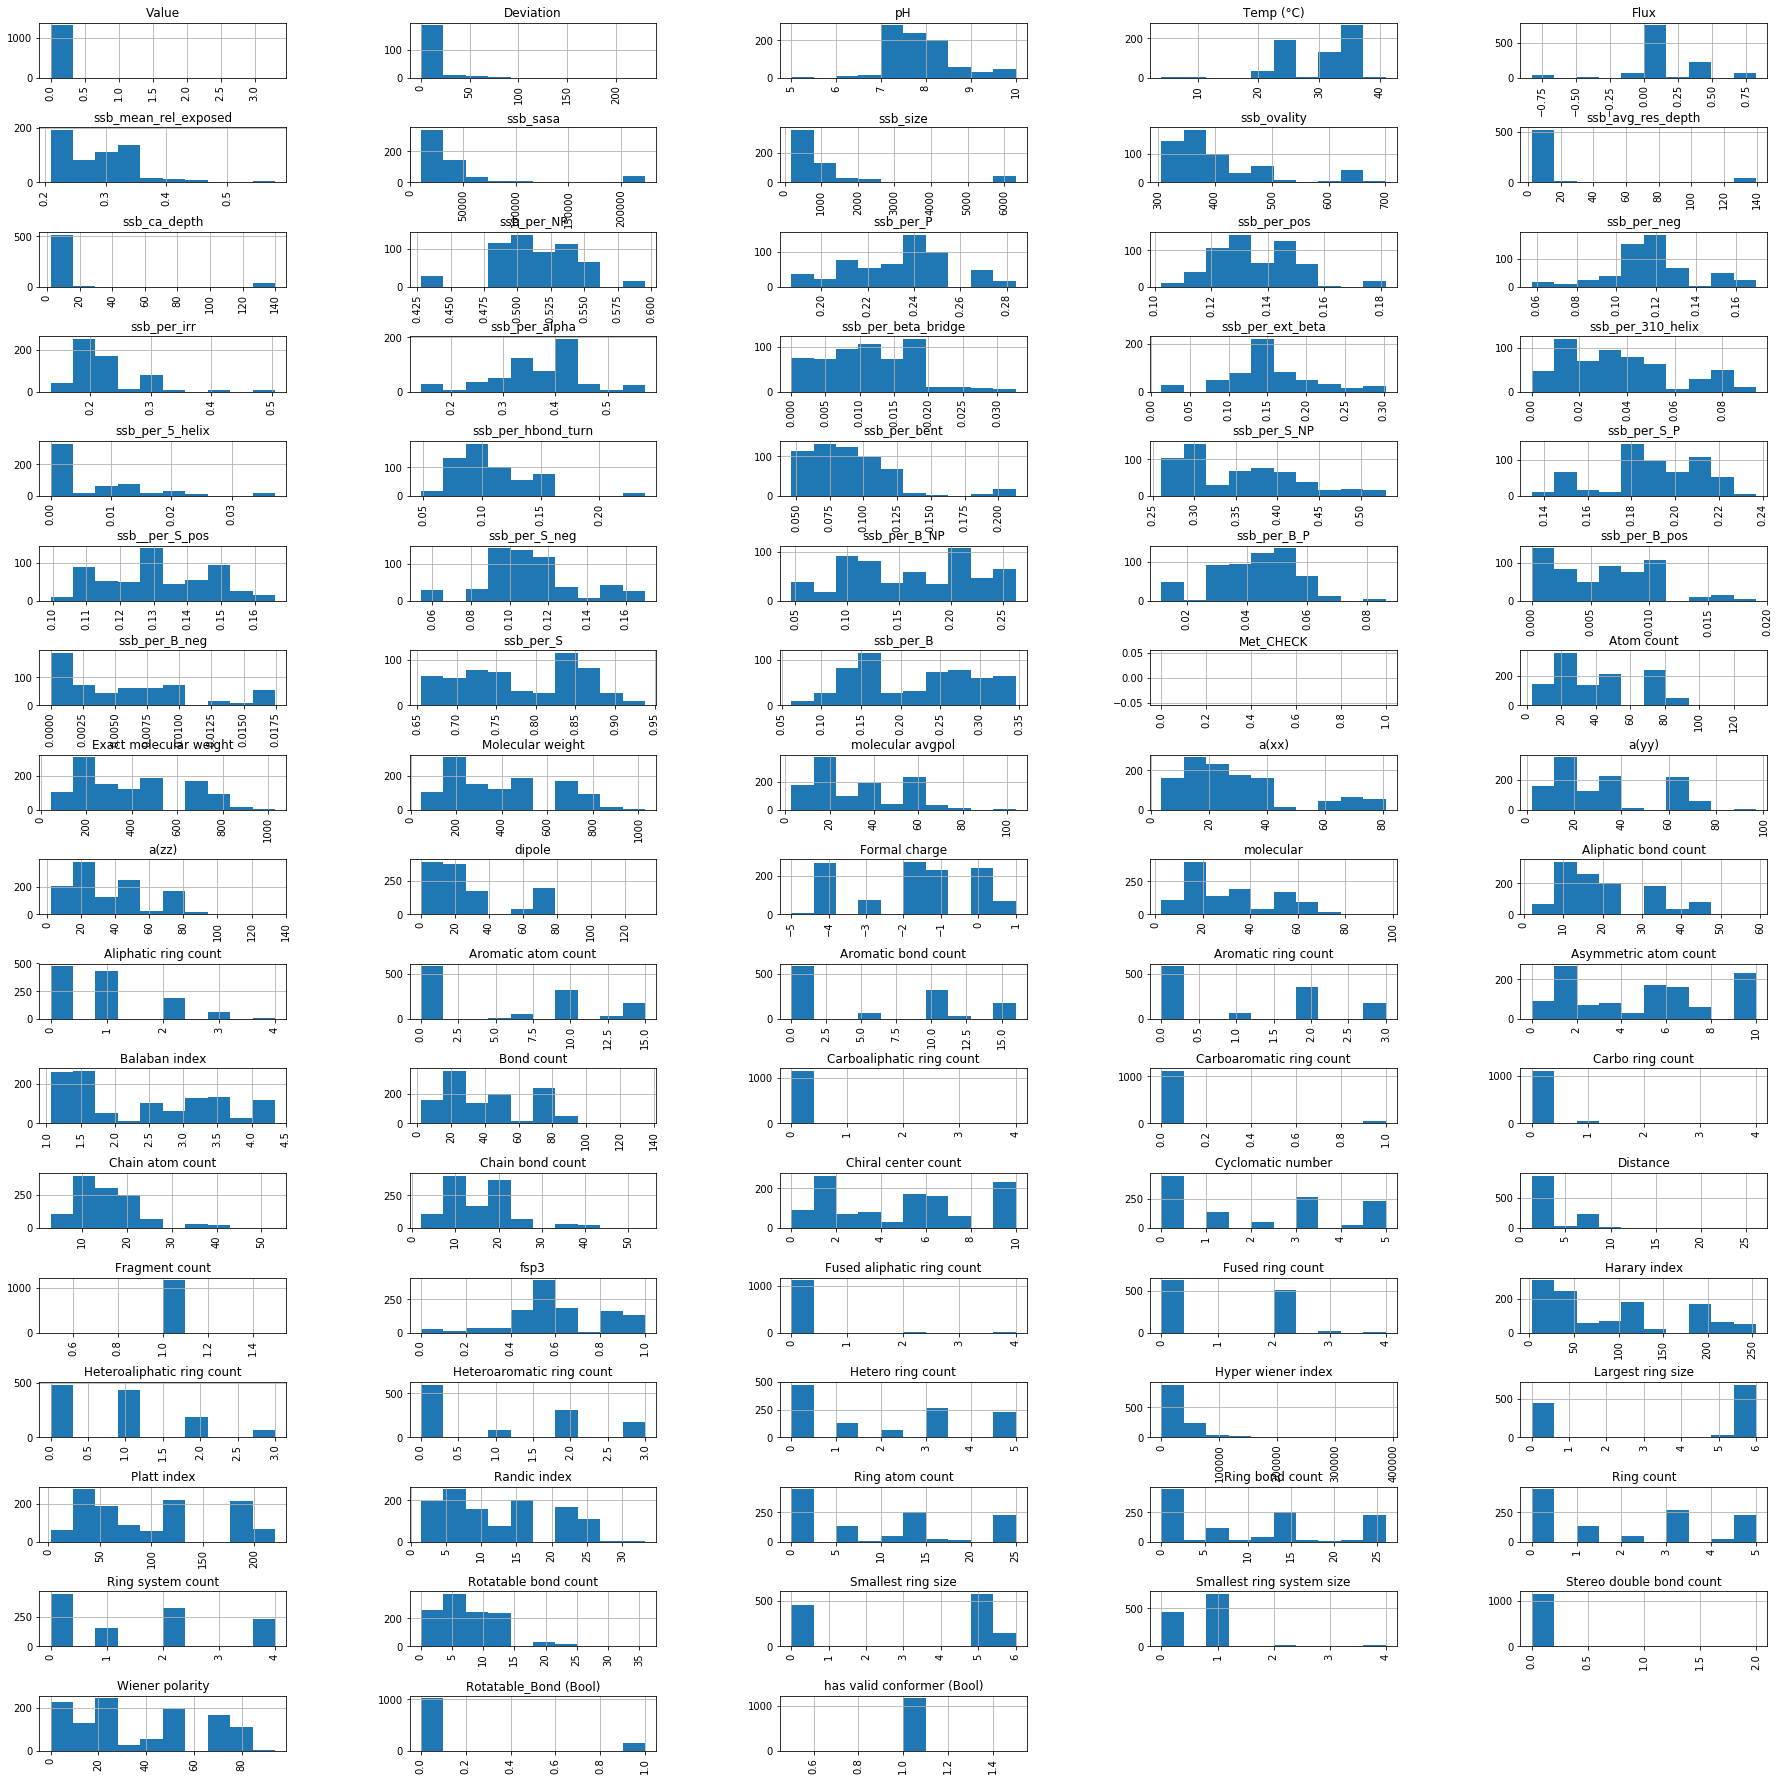

In [64]:
Left  = 0.1  # the left side of the subplots of the figure
Right = 0.9    # the right side of the subplots of the figure
Bottom = 0.1   # the bottom of the subplots of the figure
Top = .9      # the top of the subplots of the figure
Wspace = 0.5   # the amount of width reserved for space between subplots,
               # expressed as a fraction of the average axis width
Hspace = 0.9 


fig = plt.figure(figsize=(30,30))
cols = 5
rows = math.ceil(float(Kinetic_KM_numeric.shape[1]) / cols)
for i, column in enumerate(Kinetic_KM_numeric.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if Kinetic_KM_numeric.dtypes[column] == np.object:
        Kinetic_KM_numeric[column].value_counts().plot(kind="bar", axes=ax)
    else:
        Kinetic_KM_numeric[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=Hspace, wspace=Wspace, left=Left, right=Right, bottom=Bottom, top= Top)
plt.savefig("Feature Distributions.png")
plt.show()